# Case 1 - dades inventades, simples, amb ChatGPT

In [43]:
import warnings
warnings.filterwarnings("ignore")
import random

In [44]:
ratings = [random.uniform(3,5) for i in range(10)]
ratings

[3.3005490443657903,
 3.236061461339964,
 4.053512491312406,
 4.467978063626448,
 4.18215132008751,
 3.7860234513145383,
 3.974503334530509,
 3.208550504153188,
 4.848009391968415,
 4.823930596054954]

In [45]:
[random.randint(1990, 2020) for i in range(10)]

[2012, 2010, 1993, 1994, 2005, 2015, 2003, 2019, 2007, 2010]

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example DataFrame
import pandas as pd
df = pd.DataFrame({
    'artist': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'C', 'I'],
    'genre': ['rock', 'pop', 'metal', 'rock', 'pop', 'metal', 'rock', 'pop', 'metal', 'rock'],
    'rating': [random.uniform(3,5) for i in range(10)],
    'year': [random.randint(1990, 2020) for i in range(10)]
})

# Define columns
categorical_cols = ['genre']
numerical_cols = ['rating', 'year']

# Preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
X = preprocessor.fit_transform(df)

df

,artist,genre,rating,year
0,A,rock,4.592549,2018
1,B,pop,3.912976,2007
2,C,metal,3.738144,2014
3,D,rock,3.006478,2015
4,E,pop,3.001770,2008
5,F,metal,4.028238,1997
6,G,rock,3.945466,2011
7,H,pop,3.648191,2013
8,C,metal,4.358681,2013
9,I,rock,3.944697,2001


In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Try different numbers of clusters
kmeans.fit(X)

# Add cluster labels back to your DataFrame
df['cluster'] = kmeans.labels_ # ens genera una columna amb la info del cluster

df

,artist,genre,rating,year,cluster
0,A,rock,4.592549,2018,1
1,B,pop,3.912976,2007,2
2,C,metal,3.738144,2014,1
3,D,rock,3.006478,2015,0
4,E,pop,3.001770,2008,0
5,F,metal,4.028238,1997,2
6,G,rock,3.945466,2011,2
7,H,pop,3.648191,2013,2
8,C,metal,4.358681,2013,1
9,I,rock,3.944697,2001,2


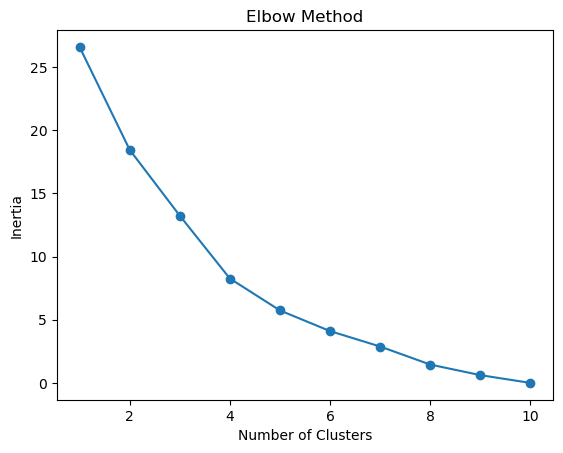

In [48]:
# Elbow method to choose k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


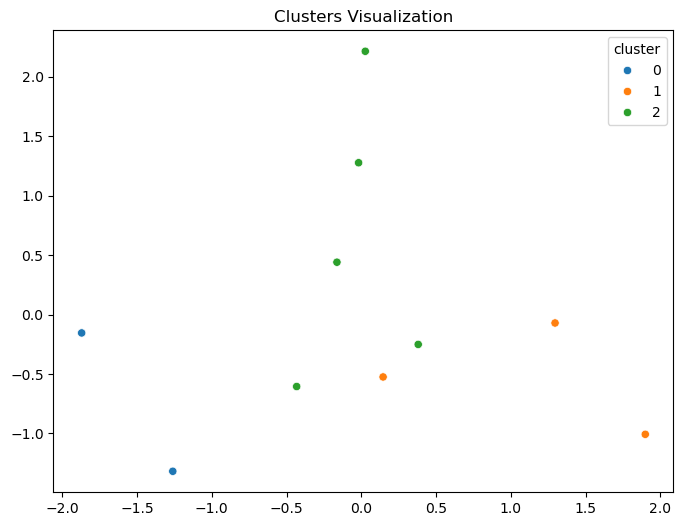

In [49]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='tab10')
plt.title('Clusters Visualization')
plt.show()


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   artist   10 non-null     object 
 1   genre    10 non-null     object 
 2   rating   10 non-null     float64
 3   year     10 non-null     int64  
 4   cluster  10 non-null     int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 492.0+ bytes


In [52]:
df.sort_values('cluster')

,artist,genre,rating,year,cluster
3,D,rock,3.006478,2015,0
4,E,pop,3.001770,2008,0
0,A,rock,4.592549,2018,1
2,C,metal,3.738144,2014,1
8,C,metal,4.358681,2013,1
1,B,pop,3.912976,2007,2
5,F,metal,4.028238,1997,2
6,G,rock,3.945466,2011,2
7,H,pop,3.648191,2013,2
9,I,rock,3.944697,2001,2


# Case 2 - df_albums

In [3]:
import warnings
warnings.filterwarnings("ignore")
import random
import pandas as pd

In [15]:
df = pd.read_csv('Datasets/albums_2020_US.csv')
df.shape

(12724, 5)

In [16]:
df

,album_id,country,year,genres,styles
0,13444201,US,2019,['Electronic'],"['Abstract', 'Ambient', 'Noise', 'Drone', 'Exp..."
1,14315809,US,2019,['Electronic'],"['Vaporwave', 'Chillwave']"
2,13613491,US,2019,['Electronic'],"['Ambient', 'Experimental', 'Drone', 'Modern C..."
3,14649729,US,2019,['Electronic'],['Dark Ambient']
4,14544152,US,2019,['Electronic'],['Noise']
...,...,...,...,...,...
12719,16047405,France,2020,['Electronic'],"['Drone', 'Dark Ambient', 'Ambient']"
12720,15931249,France,2020,['Electronic'],"['Ambient', 'Dark Ambient', 'Industrial', 'Min..."
12721,15913014,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']"
12722,15912971,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']"


In [35]:
df['genres'].unique()

array(["['Electronic']", "['Electronic', 'Rock']",
       "['Electronic', 'Jazz']", "['Electronic', 'Pop']",
       "['Electronic', 'Latin']", "['Electronic', 'Classical']",
       "['Electronic', 'Reggae']", "['Electronic', 'Blues']",
       "['Electronic', 'Rock', 'Pop']", "['Electronic', 'Hip Hop']",
       "['Electronic', 'Funk / Soul']",
       "['Electronic', 'Stage & Screen']", "['Electronic', 'Non-Music']",
       "['Electronic', 'Jazz', 'Rock']",
       "['Electronic', 'Rock', 'Classical']",
       "['Electronic', 'Jazz', 'Classical']",
       "['Electronic', 'Latin', 'Pop']",
       "['Electronic', 'Brass & Military']",
       "['Electronic', 'Rock', 'Blues']",
       "['Electronic', 'Reggae', 'Pop']", "['Electronic', 'Jazz', 'Pop']",
       "['Electronic', 'Pop', 'Classical']",
       "['Electronic', 'Rock', 'Reggae']",
       "['Electronic', 'Folk, World, & Country']",
       "['Electronic', 'Jazz', 'Funk / Soul']",
       "['Electronic', 'Funk / Soul', 'Pop']",
       "['E

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example DataFrame
import pandas as pd

# Define columns
categorical_cols = ['country', 'genres', 'styles']
numerical_cols = []

# Preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
X = preprocessor.fit_transform(df)

df

,album_id,country,year,genres,styles
0,13444201,US,2019,['Electronic'],"['Abstract', 'Ambient', 'Noise', 'Drone', 'Exp..."
1,14315809,US,2019,['Electronic'],"['Vaporwave', 'Chillwave']"
2,13613491,US,2019,['Electronic'],"['Ambient', 'Experimental', 'Drone', 'Modern C..."
3,14649729,US,2019,['Electronic'],['Dark Ambient']
4,14544152,US,2019,['Electronic'],['Noise']
...,...,...,...,...,...
12719,16047405,France,2020,['Electronic'],"['Drone', 'Dark Ambient', 'Ambient']"
12720,15931249,France,2020,['Electronic'],"['Ambient', 'Dark Ambient', 'Industrial', 'Min..."
12721,15913014,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']"
12722,15912971,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']"


In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=8, random_state=42)  # Try different numbers of clusters
kmeans.fit(X)

# Add cluster labels back to your DataFrame
df['cluster'] = kmeans.labels_ # ens genera una columna amb la info del cluster

df

,album_id,country,year,genres,styles,cluster
0,13444201,US,2019,['Electronic'],"['Abstract', 'Ambient', 'Noise', 'Drone', 'Exp...",0
1,14315809,US,2019,['Electronic'],"['Vaporwave', 'Chillwave']",0
2,13613491,US,2019,['Electronic'],"['Ambient', 'Experimental', 'Drone', 'Modern C...",0
3,14649729,US,2019,['Electronic'],['Dark Ambient'],0
4,14544152,US,2019,['Electronic'],['Noise'],6
...,...,...,...,...,...,...
12719,16047405,France,2020,['Electronic'],"['Drone', 'Dark Ambient', 'Ambient']",1
12720,15931249,France,2020,['Electronic'],"['Ambient', 'Dark Ambient', 'Industrial', 'Min...",1
12721,15913014,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']",1
12722,15912971,France,2020,['Electronic'],"['Experimental', 'Dark Ambient', 'Drone']",1


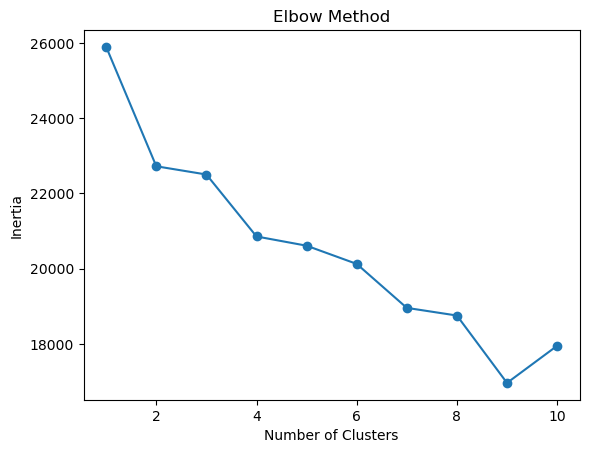

In [102]:
# Elbow method to choose k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


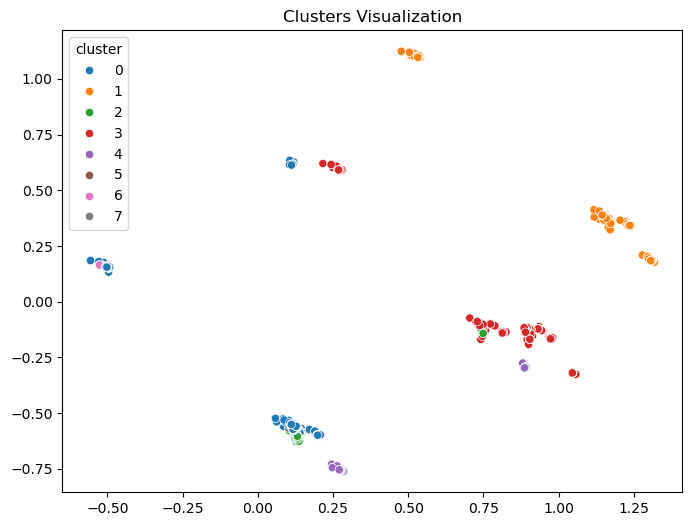

In [103]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_dense = X.toarray()  # Convert sparse matrix to dense
X_pca = pca.fit_transform(X_dense)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='tab10')
plt.title('Clusters Visualization')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   artist   10 non-null     object 
 1   genre    10 non-null     object 
 2   rating   10 non-null     float64
 3   year     10 non-null     int64  
 4   cluster  10 non-null     int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 492.0+ bytes


In [104]:
df.sort_values('cluster').head()

,album_id,country,year,genres,styles,cluster
0,13444201,US,2019,['Electronic'],"['Abstract', 'Ambient', 'Noise', 'Drone', 'Exp...",0
5610,21727927,US,2019,['Electronic'],"['Power Electronics', 'Noise']",0
5609,14274722,US,2019,['Electronic'],"['Dark Ambient', 'Drone', 'Industrial']",0
12457,16204386,US,2020,"['Pop', 'Folk, World, & Country', 'Stage & Scr...",['Holiday'],0
5607,14909849,US,2019,['Electronic'],"['Abstract', 'Broken Beat', 'New Age', 'Vaporw...",0


## Cluster 0: US

In [112]:
df[df['cluster']==0].sample(10)

,album_id,country,year,genres,styles,cluster
5080,13435592,US,2019,['Electronic'],"['Power Electronics', 'Industrial', 'Noise']",0
1620,15773025,US,2019,['Electronic'],"['Experimental', 'Noise', 'Harsh Noise Wall']",0
4301,13809545,US,2019,['Electronic'],['Harsh Noise Wall'],0
6298,14250128,US,2019,['Electronic'],['Vaporwave'],0
5688,16643853,US,2019,"['Electronic', 'Pop']","['Dark Ambient', 'Synth-pop', 'Synthwave', 'Ex...",0
1856,32521314,US,2019,['Electronic'],"['Ambient', 'Drone', 'Experimental']",0
6815,13723303,US,2019,"['Electronic', 'Jazz']","['Experimental', 'Free Improvisation']",0
4493,13374733,US,2019,['Electronic'],['Synthwave'],0
1681,13840659,US,2019,['Electronic'],['Ambient'],0
4401,13801671,US,2019,['Electronic'],['Experimental'],0


In [113]:
df[df['cluster']==0]['genres'].nunique()

227

## Cluster 1: France

In [129]:
df[df['cluster']==1].sample(10)

,album_id,country,year,genres,styles,cluster
11666,13478747,France,2019,"['Electronic', 'Rock', 'Classical', 'Folk, Wor...","['Modern Classical', 'Downtempo']",1
10100,19511971,France,2019,['Electronic'],"['Experimental', 'Abstract', 'Bass Music', 'ID...",1
11008,14822149,France,2019,"['Electronic', 'Pop']",['Electro Swing'],1
12598,15122302,France,2020,['Electronic'],"['Ambient', 'Dark Ambient']",1
10192,15305554,France,2019,['Electronic'],['Techno'],1
10014,15329509,France,2019,['Electronic'],"['Abstract', 'Electro']",1
10061,15303884,France,2019,['Electronic'],['Experimental'],1
12527,17127456,France,2020,['Electronic'],"['Dub', 'Dubstep']",1
10262,14809049,France,2019,['Electronic'],"['Darkwave', 'Synthwave', 'Electro']",1
11452,13255887,France,2019,"['Electronic', 'Stage & Screen']","['Soundtrack', 'Ambient', 'Experimental', 'Ind...",1


In [130]:
df[df['cluster']==1]['country'].nunique()

1

In [131]:
df[df['cluster']==1]['styles'].nunique()

959

## Cluster 2: US 2019 'Ambient, Drone'

In [153]:
df[df['cluster']==2].sample(10)

,album_id,country,year,genres,styles,cluster
8558,13880610,US,2019,"['Electronic', 'Stage & Screen']","['Ambient', 'Dark Ambient', 'Berlin-School', '...",2
8137,23856413,US,2019,"['Electronic', 'Stage & Screen']","['Chiptune', 'Deep House', 'Video Game Music']",2
8670,14418967,US,2019,"['Electronic', 'Stage & Screen']","['Nerdcore Techno', 'Gabber', 'Abstract', 'Vid...",2
7443,18448327,US,2019,"['Electronic', 'Stage & Screen']","['Soundtrack', 'Synthwave']",2
8789,14737506,US,2019,"['Electronic', 'Stage & Screen']","['Synthwave', 'Soundtrack']",2
8644,14226960,US,2019,"['Electronic', 'Stage & Screen']","['Modern Classical', 'Score']",2
7525,30798831,US,2019,"['Electronic', 'Stage & Screen']","['Industrial', 'Darkwave']",2
12125,18021196,US,2020,"['Electronic', 'Stage & Screen']","['Soundtrack', 'Video Game Music']",2
12278,16678218,US,2020,"['Electronic', 'Stage & Screen']","['Soundtrack', 'Score']",2
8027,14405669,US,2019,"['Electronic', 'Stage & Screen']","['Ambient', 'Minimal', 'Experimental']",2


In [155]:
df[df['cluster']==2]['genres'].nunique()

2

In [169]:
df[df['cluster']==6].sample(10)

,album_id,country,year,genres,styles,cluster
5298,14335539,US,2019,['Electronic'],['Noise'],6
5306,13667582,US,2019,['Electronic'],['Noise'],6
113,13087508,US,2019,['Electronic'],['Noise'],6
5102,15099208,US,2019,['Electronic'],['Noise'],6
37,14401672,US,2019,['Electronic'],['Noise'],6
476,13859001,US,2019,['Electronic'],['Noise'],6
5600,13304299,US,2019,['Electronic'],['Noise'],6
3685,13944918,US,2019,['Electronic'],['Noise'],6
5118,14327772,US,2019,['Electronic'],['Noise'],6
6214,13288837,US,2019,['Electronic'],['Noise'],6
